In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('../')  # set the working directory as "./sobot_rimulator"
os.getcwd()

'/home/yixing/code/project_work/sobot-rimulator'

# Analysis of Time Cost

In [181]:
df = pd.read_csv("./scripts/results/time_cost_g2o.csv")
df.head(15)

,name,iteration,linearization_time_cost,solve_time_cost,global_error,solver
0,INTEL,0,0.000000,0.000000,5.149721e+06,cholesky
1,INTEL,1,0.330329,0.001685,1.511636e+08,cholesky
2,INTEL,2,0.530313,0.001568,5.143087e+06,cholesky
3,INTEL,3,0.408905,0.001734,3.266647e+04,cholesky
4,INTEL,4,0.265301,0.001661,2.158643e+02,cholesky
5,INTEL,5,0.391075,0.002348,2.158333e+02,cholesky
6,INTEL,6,0.430123,0.001517,2.158333e+02,cholesky
7,INTEL,7,0.368369,0.002048,2.158334e+02,cholesky
8,INTEL,8,0.438725,0.002320,2.158335e+02,cholesky
9,INTEL,9,0.486345,0.010388,2.158333e+02,cholesky


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


name,MITB,INTEL,M3500
iteration,,,
1,0.403756,0.330329,1.645158
2,0.157356,0.530313,1.518146
3,0.209980,0.408905,1.170005
4,0.196232,0.265301,1.685365
5,0.476602,0.391075,1.077702
6,0.527972,0.430123,1.170905
7,0.158348,0.368369,1.057011
8,0.157268,0.438725,1.063598
9,0.373567,0.486345,1.618649


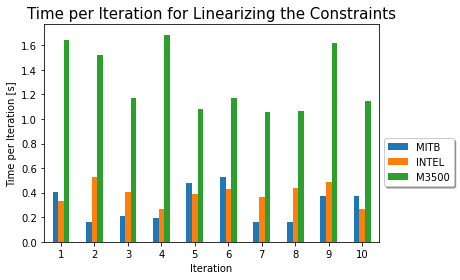

In [191]:
linear_time = df.pivot(index = "iteration", columns = "name", 
            values="linearization_time_cost")
linear_time = linear_time[linear_time.index != 0]
linear_time = linear_time[["MITB", "INTEL", "M3500"]]
linear_time.plot(kind = "bar", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("Time per Iteration [s]")
plt.title("Time per Iteration for Linearizing the Constraints", size = 15)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True)
plt.savefig('./scripts/fig/{0}.eps'.format("Time_per_Iteration_for_Linearizing_the_Constraints"), format='eps')
linear_time


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


name,MITB,INTEL,M3500
iteration,,,
1,0.000875,0.001685,0.008877
2,0.000960,0.001568,0.009420
3,0.002033,0.001734,0.009727
4,0.000866,0.001661,0.012730
5,0.000909,0.002348,0.009400
6,0.000872,0.001517,0.009147
7,0.001603,0.002048,0.009091
8,0.000878,0.002320,0.008996
9,0.004806,0.010388,0.009190


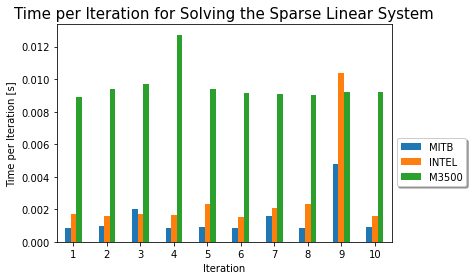

In [190]:
solve_time = df.pivot(index = "iteration", columns = "name", values="solve_time_cost")
solve_time = solve_time[solve_time.index != 0]
solve_time = solve_time[["MITB", "INTEL", "M3500"]]
solve_time.plot(kind = "bar", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("Time per Iteration [s]")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True)
plt.title("Time per Iteration for Solving the Sparse Linear System", size = 15)
plt.savefig('./scripts/fig/{0}.eps'.format("Time_per_Iteration_for_Solving_the_Sparse_Linear_System"), format='eps')
solve_time


name,INTEL,M3500,MITB
iteration,,,
0,5.149721e+06,2.566668e+06,4.414182e+09
1,1.511636e+08,4.371203e+05,1.940530e+10
2,5.143087e+06,2.013603e+04,4.232531e+08
3,3.266647e+04,2.640612e+02,6.183813e+07
4,2.158643e+02,1.379446e+02,1.196271e+08
5,2.158333e+02,1.379130e+02,5.099310e+06
6,2.158333e+02,1.379130e+02,4.417204e+05
7,2.158334e+02,1.379130e+02,1.842363e+03
8,2.158335e+02,1.379130e+02,8.031589e+02


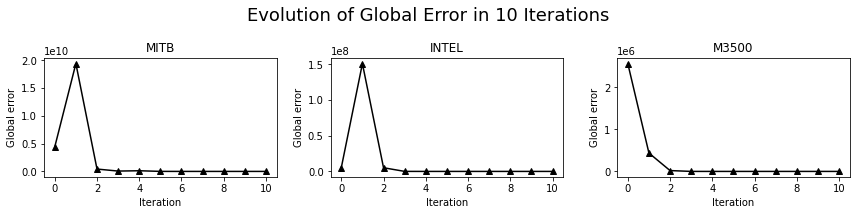

In [192]:
global_error = df.pivot(index = "iteration", columns = "name", values="global_error")

plt.subplot(1,3,2)
global_error["INTEL"].plot(color = "k", marker = "^", rot = 0, figsize=(12,3))
plt.xlabel("Iteration")
plt.ylabel("Global error")
plt.title("INTEL")

plt.subplot(1,3,3)
global_error["M3500"].plot(color = "k", marker = "^", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("Global error")
plt.title("M3500")

plt.subplot(1,3,1)
global_error["MITB"].plot(color = "k", marker = "^", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("Global error")
plt.title("MITB")
plt.suptitle("Evolution of Global Error in 10 Iterations", size = 18)
plt.tight_layout()
plt.savefig('./scripts/fig/{0}.eps'.format("Evolution_of_Global_Error"), format='eps')
global_error


In [98]:
import math

#filename = "./scripts/sobot_information1.csv"
filename = "../experiment/sobot_information1_exp1.csv"
df = pd.read_csv(filename, index_col=0)
df.head(10)

/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,sim_circle,landmark_id,estimated_landmark_position,estimated_robot_pose,actual_landmark_position,actual_robot_pose,slam_name
0,1,6,"(0.10385481117155455, 0.09351129199865625)","(0.0, 0.0, 0.0)","(0.125, 0.125, 0.3578257933324993)","(0.0, 0.0, 0.0)",EKF SLAM
1,1,6,"(0.10030067593470071, 0.09378699133755729)","(-0.0033011944870906616, -4.458058661950655e-0...","(0.125, 0.125, 0.3578257933324993)","(0.0, 0.0, 0.0)",FastSLAM
2,2,6,"(0.09554290890139702, 0.109879308391407)","(0.007073865194571503, 4.249802903776847e-05, ...","(0.125, 0.125, 0.3578257933324993)","(0.007981675195326485, 0.0, 0.22731862546327308)",EKF SLAM
3,2,7,"(0.014441156907504027, 0.21526858917288222)","(0.007073865194571503, 4.249802903776847e-05, ...","(0.0, 0.25, 1.1599655493155447)","(0.007981675195326485, 0.0, 0.22731862546327308)",EKF SLAM
4,2,86,"(0.216405261782996, 0.10233107582678083)","(0.007073865194571503, 4.249802903776847e-05, ...","(0.25, 0.125, -1.0173384169353508)","(0.007981675195326485, 0.0, 0.22731862546327308)",EKF SLAM
5,2,85,"(0.21113225977154548, 0.00019272225114451885)","(0.007073865194571503, 4.249802903776847e-05, ...","(0.25, 0.0, -1.7297776469907324)","(0.007981675195326485, 0.0, 0.22731862546327308)",EKF SLAM
6,2,84,"(0.21352845193104686, -0.11419854121454129)","(0.007073865194571503, 4.249802903776847e-05, ...","(0.25, -0.125, -2.3813008680032253)","(0.007981675195326485, 0.0, 0.22731862546327308)",EKF SLAM
7,2,6,"(0.0926126301974788, 0.10931999778724213)","(0.002371202521848309, 0.0006175504970712253, ...","(0.125, 0.125, 0.3578257933324993)","(0.007981675195326485, 0.0, 0.22731862546327308)",FastSLAM
8,2,7,"(0.009224557187867808, 0.21586053048164403)","(0.002371202521848309, 0.0006175504970712253, ...","(0.0, 0.25, 1.1599655493155447)","(0.007981675195326485, 0.0, 0.22731862546327308)",FastSLAM
9,2,86,"(0.2114625608359055, 0.10339590728451808)","(0.002371202521848309, 0.0006175504970712253, ...","(0.25, 0.125, -1.0173384169353508)","(0.007981675195326485, 0.0, 0.22731862546327308)",FastSLAM


In [85]:
# print(df["sim_circle"].min(), df["sim_circle"].max())
# # df["slam_name"] = df["slam_name"] - df["sim_circle"].min()
# min_sim_circle  = df["sim_circle"].min()
# df["sim_circle"] = df.apply (lambda row: row.sim_circle - min_sim_circle + 1, axis=1)


In [99]:
df


,sim_circle,landmark_id,estimated_landmark_position,estimated_robot_pose,actual_landmark_position,actual_robot_pose,slam_name
0,1,6,"(0.10385481117155455, 0.09351129199865625)","(0.0, 0.0, 0.0)","(0.125, 0.125, 0.3578257933324993)","(0.0, 0.0, 0.0)",EKF SLAM
1,1,6,"(0.10030067593470071, 0.09378699133755729)","(-0.0033011944870906616, -4.458058661950655e-0...","(0.125, 0.125, 0.3578257933324993)","(0.0, 0.0, 0.0)",FastSLAM
2,2,6,"(0.09554290890139702, 0.109879308391407)","(0.007073865194571503, 4.249802903776847e-05, ...","(0.125, 0.125, 0.3578257933324993)","(0.007981675195326485, 0.0, 0.22731862546327308)",EKF SLAM
3,2,7,"(0.014441156907504027, 0.21526858917288222)","(0.007073865194571503, 4.249802903776847e-05, ...","(0.0, 0.25, 1.1599655493155447)","(0.007981675195326485, 0.0, 0.22731862546327308)",EKF SLAM
4,2,86,"(0.216405261782996, 0.10233107582678083)","(0.007073865194571503, 4.249802903776847e-05, ...","(0.25, 0.125, -1.0173384169353508)","(0.007981675195326485, 0.0, 0.22731862546327308)",EKF SLAM
...,...,...,...,...,...,...,...
2685402,7601,144,"(-0.12630749767771904, -1.7061105261029186)","(1.2716359399294954, -1.2515675084549531, -2.6...","(-0.125, -1.75, -2.782412650776584)","(1.2583417776087213, -1.1676570816602836, -2.7...",Graph-based SLAM
2685403,7601,262,"(0.1754571832934326, -1.57684128162463)","(1.2716359399294954, -1.2515675084549531, -2.6...","(0.25, -1.625, 1.4359909671215387)","(1.2583417776087213, -1.1676570816602836, -2.7...",Graph-based SLAM
2685404,7601,102,"(1.0523007283348225, -0.8168394099144631)","(1.2716359399294954, -1.2515675084549531, -2.6...","(1.0, -0.75, -1.9452118773299198)","(1.2583417776087213, -1.1676570816602836, -2.7...",Graph-based SLAM
2685405,7601,132,"(2.7075451115766325, -0.37051938949783936)","(1.2716359399294954, -1.2515675084549531, -2.6...","(2.625, -0.375, -1.475272695063435)","(1.2583417776087213, -1.1676570816602836, -2.7...",Graph-based SLAM


In [102]:
#filename = "./scripts/sobot_information2_exp1.csv"
filename = "../experiment/sobot_information2_exp1.csv"
df2 = pd.read_csv(filename, index_col=0)
df2.head(5)

# print(df2["sim_circle"].min(), df2["sim_circle"].max())
# # df["slam_name"] = df["slam_name"] - df["sim_circle"].min()
# min_sim_circle  = df2["sim_circle"].min()
# df2["sim_circle"] = df2.apply (lambda row: row.sim_circle - min_sim_circle + 1, axis=1)

,sim_circle,name,time_per_update
0,1,EKF SLAM,0.000686
1,1,FastSLAM,0.017527
2,1,Graph-based SLAM,0.000077
3,1,OccupancyGridMapping2d,0.000279
4,1,A Star planning,0.000001


In [103]:
df2.tail(10)

,sim_circle,name,time_per_update
62036,7597,Graph-based SLAM,0.000087
62037,7598,EKF SLAM,0.006906
62038,7598,FastSLAM,0.053259
62039,7598,Graph-based SLAM,0.000046
62040,7599,EKF SLAM,0.005467
62041,7599,FastSLAM,0.037447
62042,7599,Graph-based SLAM,0.000044
62043,7600,EKF SLAM,0.002669
62044,7600,FastSLAM,0.012578
62045,7600,Graph-based SLAM,0.000048


In [104]:
df = df[df["sim_circle"] < 6000]
df.tail(10)

,sim_circle,landmark_id,estimated_landmark_position,estimated_robot_pose,actual_landmark_position,actual_robot_pose,slam_name
1917803,5999,178,"(-0.36014469860580867, -0.42380320499794977)","(-0.08924892378088702, -0.5825680521212133, -0...","(-0.375, -0.5, 2.096981395338153)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917804,5999,136,"(-0.11696277246008834, -0.7020734756016095)","(-0.08924892378088702, -0.5825680521212133, -0...","(-0.125, -0.75, 3.112832563464014)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917805,5999,135,"(-0.23360680167046824, -0.5425818198697903)","(-0.08924892378088702, -0.5825680521212133, -0...","(-0.25, -0.625, 2.8734114817635295)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917806,5999,139,"(-0.01173528376814501, -1.0551423504817237)","(-0.08924892378088702, -0.5825680521212133, -0...","(0.0, -1.125, -2.168975515429748)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917807,5999,137,"(-0.12927596990915866, -0.8043415658655332)","(-0.08924892378088702, -0.5825680521212133, -0...","(-0.125, -0.875, 0.35040271022821967)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917808,5999,263,"(0.3102715851252363, -1.425559188873769)","(-0.08924892378088702, -0.5825680521212133, -0...","(0.375, -1.5, -1.1706999618442695)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917809,5999,141,"(-0.025093812497715893, -1.335459736111913)","(-0.08924892378088702, -0.5825680521212133, -0...","(0.0, -1.375, 0.4975044398749078)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917810,5999,143,"(-0.13903890947545242, -1.5633892592821794)","(-0.08924892378088702, -0.5825680521212133, -0...","(-0.125, -1.625, 1.5580763975133598)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917811,5999,144,"(-0.14911543132255828, -1.7020960767585323)","(-0.08924892378088702, -0.5825680521212133, -0...","(-0.125, -1.75, -2.782412650776584)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917812,5999,262,"(0.14343925364200338, -1.5715763255431383)","(-0.08924892378088702, -0.5825680521212133, -0...","(0.25, -1.625, 1.4359909671215387)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM


In [158]:
df2 = df2[df2["sim_circle"] < 6000]
df2.tail(10)

,sim_circle,name,time_per_update
53858,5998,A Star planning,4.768372e-07
53859,5999,EKF SLAM,3.112793e-03
53860,5999,FastSLAM,2.002120e-02
53861,5999,Graph-based SLAM,4.410744e-05
53862,5999,OccupancyGridMapping2d,2.472401e-04
53863,5999,A Star planning,1.907349e-06
53864,5999,OccupancyGridMapping2d,2.079010e-04
53865,5999,A Star planning,7.152557e-07
53866,5999,OccupancyGridMapping2d,1.919270e-04
53867,5999,A Star planning,7.152557e-07


# Evaluation Landmark Positions

In [105]:
df_lm = df[["sim_circle", "slam_name", "landmark_id", "estimated_landmark_position", "actual_landmark_position"]]
df_lm

,sim_circle,slam_name,landmark_id,estimated_landmark_position,actual_landmark_position
0,1,EKF SLAM,6,"(0.10385481117155455, 0.09351129199865625)","(0.125, 0.125, 0.3578257933324993)"
1,1,FastSLAM,6,"(0.10030067593470071, 0.09378699133755729)","(0.125, 0.125, 0.3578257933324993)"
2,2,EKF SLAM,6,"(0.09554290890139702, 0.109879308391407)","(0.125, 0.125, 0.3578257933324993)"
3,2,EKF SLAM,7,"(0.014441156907504027, 0.21526858917288222)","(0.0, 0.25, 1.1599655493155447)"
4,2,EKF SLAM,86,"(0.216405261782996, 0.10233107582678083)","(0.25, 0.125, -1.0173384169353508)"
...,...,...,...,...,...
1917808,5999,Graph-based SLAM,263,"(0.3102715851252363, -1.425559188873769)","(0.375, -1.5, -1.1706999618442695)"
1917809,5999,Graph-based SLAM,141,"(-0.025093812497715893, -1.335459736111913)","(0.0, -1.375, 0.4975044398749078)"
1917810,5999,Graph-based SLAM,143,"(-0.13903890947545242, -1.5633892592821794)","(-0.125, -1.625, 1.5580763975133598)"
1917811,5999,Graph-based SLAM,144,"(-0.14911543132255828, -1.7020960767585323)","(-0.125, -1.75, -2.782412650776584)"


In [106]:
actual_landmark_position = df_lm["actual_landmark_position"].tolist()
actual_landmark_position = list(set(actual_landmark_position))
print("# Landmarks:", len(actual_landmark_position))

# Landmarks: 164


In [93]:
id = df_lm["landmark_id"].tolist()
id = list(set(id))
print (id)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 60, 61, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 122, 123, 124, 125, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 139, 141, 143, 144, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 233, 234, 235, 236, 239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 252, 253, 255, 256, 257, 258, 259, 262, 263, 266]


In [117]:
# calculate distance
actual_landmark_position =  np.array([eval(x)[0:2] for x in df_lm["actual_landmark_position"].tolist()])
estimated_landmark_position = np.array([eval(x) for x in df_lm["estimated_landmark_position"].tolist()])
actual_landmark_position

array([[ 0.125,  0.125],
       [ 0.125,  0.125],
       [ 0.125,  0.125],
       ...,
       [-0.125, -1.625],
       [-0.125, -1.75 ],
       [ 0.25 , -1.625]])

tuple

In [118]:
distance = np.linalg.norm(actual_landmark_position-estimated_landmark_position, axis = 1)
df_lm.loc[:, 'distance'] = distance

/home/yixing/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/yixing/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [119]:
df_lm.tail(10)

,sim_circle,slam_name,landmark_id,estimated_landmark_position,actual_landmark_position,distance
1917803,5999,Graph-based SLAM,178,"(-0.36014469860580867, -0.42380320499794977)","(-0.375, -0.5, 2.096981395338153)",0.077631
1917804,5999,Graph-based SLAM,136,"(-0.11696277246008834, -0.7020734756016095)","(-0.125, -0.75, 3.112832563464014)",0.048596
1917805,5999,Graph-based SLAM,135,"(-0.23360680167046824, -0.5425818198697903)","(-0.25, -0.625, 2.8734114817635295)",0.084033
1917806,5999,Graph-based SLAM,139,"(-0.01173528376814501, -1.0551423504817237)","(0.0, -1.125, -2.168975515429748)",0.070836
1917807,5999,Graph-based SLAM,137,"(-0.12927596990915866, -0.8043415658655332)","(-0.125, -0.875, 0.35040271022821967)",0.070788
1917808,5999,Graph-based SLAM,263,"(0.3102715851252363, -1.425559188873769)","(0.375, -1.5, -1.1706999618442695)",0.098647
1917809,5999,Graph-based SLAM,141,"(-0.025093812497715893, -1.335459736111913)","(0.0, -1.375, 0.4975044398749078)",0.046831
1917810,5999,Graph-based SLAM,143,"(-0.13903890947545242, -1.5633892592821794)","(-0.125, -1.625, 1.5580763975133598)",0.063190
1917811,5999,Graph-based SLAM,144,"(-0.14911543132255828, -1.7020960767585323)","(-0.125, -1.75, -2.782412650776584)",0.053632
1917812,5999,Graph-based SLAM,262,"(0.14343925364200338, -1.5715763255431383)","(0.25, -1.625, 1.4359909671215387)",0.119203


In [120]:
df_lm_sum = df_lm.groupby(['sim_circle','slam_name'])["distance"].mean().unstack(level = -1)
df_lm_sum.tail(10)

slam_name,EKF SLAM,FastSLAM,Graph-based SLAM
sim_circle,,,
5990,0.600037,0.353052,0.071344
5991,0.600026,0.353063,0.071344
5992,0.599995,0.353073,0.071344
5993,0.599995,0.353073,0.071344
5994,0.599872,0.353078,0.071344
5995,0.599788,0.353079,0.071344
5996,0.599733,0.353093,0.071344
5997,0.599701,0.353106,0.071344
5998,0.599705,0.353116,0.071344


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


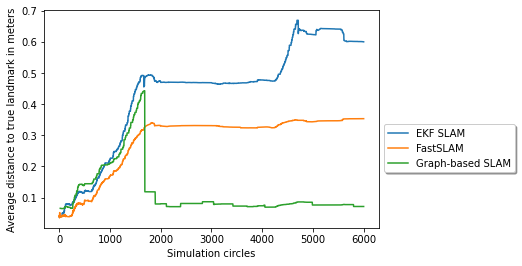

In [217]:

df_lm_sum.plot()
#plt.ylim(0, 1.75)
plt.xlabel("Simulation circles")
plt.ylabel("Average distance to true landmark in meters")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True)
plt.savefig('./scripts/fig/{0}.eps'.format("fig1"), format='eps', bbox_inches='tight')

# Evaluation Robot Poses

In [123]:
df.tail(5)

,sim_circle,landmark_id,estimated_landmark_position,estimated_robot_pose,actual_landmark_position,actual_robot_pose,slam_name
1917808,5999,263,"(0.3102715851252363, -1.425559188873769)","(-0.08924892378088702, -0.5825680521212133, -0...","(0.375, -1.5, -1.1706999618442695)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917809,5999,141,"(-0.025093812497715893, -1.335459736111913)","(-0.08924892378088702, -0.5825680521212133, -0...","(0.0, -1.375, 0.4975044398749078)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917810,5999,143,"(-0.13903890947545242, -1.5633892592821794)","(-0.08924892378088702, -0.5825680521212133, -0...","(-0.125, -1.625, 1.5580763975133598)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917811,5999,144,"(-0.14911543132255828, -1.7020960767585323)","(-0.08924892378088702, -0.5825680521212133, -0...","(-0.125, -1.75, -2.782412650776584)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM
1917812,5999,262,"(0.14343925364200338, -1.5715763255431383)","(-0.08924892378088702, -0.5825680521212133, -0...","(0.25, -1.625, 1.4359909671215387)","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM


In [124]:
df_robot = df[["sim_circle","estimated_robot_pose","actual_robot_pose","slam_name"]]
df_robot = df_robot.drop_duplicates(["sim_circle", "slam_name"])
df_robot
df_robot.tail(10)

,sim_circle,estimated_robot_pose,actual_robot_pose,slam_name
1916229,5996,"(-0.10166058065608685, -0.5546419821253417, -1...","(-0.03515225959309706, -0.5984826299576842, -1...",Graph-based SLAM
1916379,5997,"(-0.16068119551835913, -0.5302515940732846, -1...","(-0.034505178170632714, -0.6042524578843449, -...",EKF SLAM
1916543,5997,"(-0.23923474149489557, -0.8514347194636317, -1...","(-0.034505178170632714, -0.6042524578843449, -...",FastSLAM
1916707,5997,"(-0.10075671559639815, -0.560629001537036, -1....","(-0.034505178170632714, -0.6042524578843449, -...",Graph-based SLAM
1916857,5998,"(-0.15987406476444366, -0.5365147503975015, -1...","(-0.032604833544415, -0.6096359145312653, -1.0...",EKF SLAM
1917021,5998,"(-0.2389546910849879, -0.8578245005566152, -1....","(-0.032604833544415, -0.6096359145312653, -1.0...",FastSLAM
1917185,5998,"(-0.09584174455261359, -0.5730562099602284, -1...","(-0.032604833544415, -0.6096359145312653, -1.0...",Graph-based SLAM
1917335,5999,"(-0.15459752079400704, -0.5475371617468022, -1...","(-0.02577003813876411, -0.6203780379880203, -0...",EKF SLAM
1917499,5999,"(-0.23572701509086325, -0.8682192504920037, -1...","(-0.02577003813876411, -0.6203780379880203, -0...",FastSLAM
1917663,5999,"(-0.08924892378088702, -0.5825680521212133, -0...","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM


In [128]:
estimated_robot_pose = np.array([eval(x)[0:2] for x in df_robot["estimated_robot_pose"].tolist()])
actual_robot_pose = np.array([eval(x)[0:2] for x in df_robot["actual_robot_pose"].tolist()])
distance = np.linalg.norm(estimated_robot_pose-actual_robot_pose, axis = 1)
df_robot.loc[:, 'distance'] = distance
df_robot.tail(10)

# calculate distance
# estimated_robot_pose = np.array(df_robot["estimated_robot_pose"].tolist())[:, 0:2]
# actual_robot_pose = np.array(df_robot["actual_robot_pose"].tolist())[:, 0:2]
# distance = np.linalg.norm(estimated_robot_pose-actual_robot_pose, axis = 1)
# df_robot.loc[:, 'distance'] = distance
# df_robot.tail(10)

,sim_circle,estimated_robot_pose,actual_robot_pose,slam_name,distance
1916229,5996,"(-0.10166058065608685, -0.5546419821253417, -1...","(-0.03515225959309706, -0.5984826299576842, -1...",Graph-based SLAM,0.079658
1916379,5997,"(-0.16068119551835913, -0.5302515940732846, -1...","(-0.034505178170632714, -0.6042524578843449, -...",EKF SLAM,0.146275
1916543,5997,"(-0.23923474149489557, -0.8514347194636317, -1...","(-0.034505178170632714, -0.6042524578843449, -...",FastSLAM,0.320957
1916707,5997,"(-0.10075671559639815, -0.560629001537036, -1....","(-0.034505178170632714, -0.6042524578843449, -...",Graph-based SLAM,0.079324
1916857,5998,"(-0.15987406476444366, -0.5365147503975015, -1...","(-0.032604833544415, -0.6096359145312653, -1.0...",EKF SLAM,0.146779
1917021,5998,"(-0.2389546910849879, -0.8578245005566152, -1....","(-0.032604833544415, -0.6096359145312653, -1.0...",FastSLAM,0.322766
1917185,5998,"(-0.09584174455261359, -0.5730562099602284, -1...","(-0.032604833544415, -0.6096359145312653, -1.0...",Graph-based SLAM,0.073055
1917335,5999,"(-0.15459752079400704, -0.5475371617468022, -1...","(-0.02577003813876411, -0.6203780379880203, -0...",EKF SLAM,0.147994
1917499,5999,"(-0.23572701509086325, -0.8682192504920037, -1...","(-0.02577003813876411, -0.6203780379880203, -0...",FastSLAM,0.324819
1917663,5999,"(-0.08924892378088702, -0.5825680521212133, -0...","(-0.02577003813876411, -0.6203780379880203, -0...",Graph-based SLAM,0.073886


In [129]:
df_robot_pivot = df_robot.pivot(index = "sim_circle", columns = "slam_name", 
            values="distance")
df_robot_pivot

slam_name,EKF SLAM,FastSLAM,Graph-based SLAM
sim_circle,,,
1,0.000000,0.003301,NaN
2,0.000909,0.005644,NaN
3,0.000423,0.005553,NaN
4,0.005609,0.010641,NaN
5,0.004412,0.002206,NaN
...,...,...,...
5995,0.134711,0.322056,0.079846
5996,0.143782,0.322446,0.079658
5997,0.146275,0.320957,0.079324


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


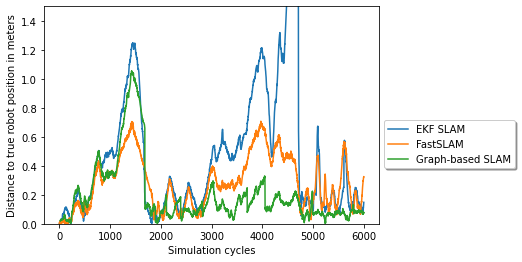

In [216]:
df_robot_pivot.plot()
plt.ylim(0,2)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True)
plt.ylim(0,1.5)
plt.xlabel("Simulation cycles")
plt.ylabel("Distance to true robot position in meters")
plt.savefig('./scripts/fig/{0}.eps'.format("fig2"), format='eps', bbox_inches='tight')

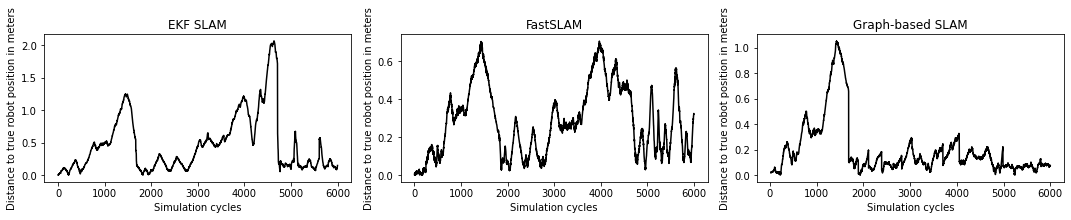

In [250]:

plt.subplot(1,3,1)
df_robot_pivot["EKF SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Distance to true robot position in meters")
plt.title("EKF SLAM")

plt.subplot(1,3,2)
df_robot_pivot["FastSLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Distance to true robot position in meters")
plt.title("FastSLAM")

plt.subplot(1,3,3)
df_robot_pivot["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Distance to true robot position in meters")
plt.title("Graph-based SLAM")

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('./scripts/fig/{0}.eps'.format("fig4"), format='eps', bbox_inches='tight')

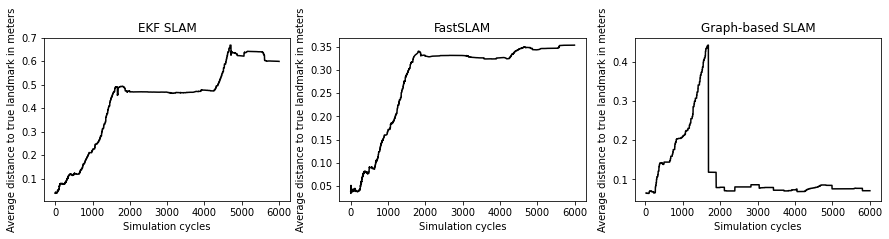

In [251]:
plt.subplot(1,3,1)
df_lm_sum["EKF SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Average distance to true landmark in meters")
plt.title("EKF SLAM")

plt.subplot(1,3,2)
df_lm_sum["FastSLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Average distance to true landmark in meters")
plt.title("FastSLAM")

plt.subplot(1,3,3)
df_lm_sum["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(15,3))
plt.xlabel("Simulation cycles")
plt.ylabel("Average distance to true landmark in meters")
plt.title("Graph-based SLAM")
plt.savefig('./scripts/fig/{0}.eps'.format("fig5"), format='eps', bbox_inches='tight')

# Time used in Update

In [160]:
df2.head(10)

,sim_circle,name,time_per_update
0,1,EKF SLAM,6.864071e-04
1,1,FastSLAM,1.752710e-02
2,1,Graph-based SLAM,7.748604e-05
3,1,OccupancyGridMapping2d,2.791882e-04
4,1,A Star planning,1.430511e-06
5,1,OccupancyGridMapping2d,2.055168e-04
6,1,A Star planning,7.152557e-07
7,1,OccupancyGridMapping2d,1.883507e-04
8,1,A Star planning,9.536743e-07
9,2,EKF SLAM,2.150536e-03


In [161]:
df2_mean = df2.groupby(["sim_circle", "name"])["time_per_update"].mean().unstack()
df2_mean.head(50)

name,A Star planning,EKF SLAM,FastSLAM,Graph-based SLAM,OccupancyGridMapping2d
sim_circle,,,,,
1,1.033147e-06,0.000686,0.017527,0.000077,0.000224
2,1.033147e-06,0.002151,0.021023,0.000082,0.000247
3,9.536743e-07,0.000525,0.024024,0.000076,0.000259
4,1.192093e-06,0.000336,0.016286,0.000070,0.000226
5,1.430511e-06,0.000488,0.028234,0.000045,0.000266
6,1.430511e-06,0.000253,0.009429,0.000058,0.000287
7,1.112620e-06,0.000442,0.027207,0.000047,0.000242
8,9.536743e-07,0.000889,0.040360,0.000045,0.000236
9,3.879865e-04,0.000682,0.016230,0.000068,0.000222


(0.0, 0.1)

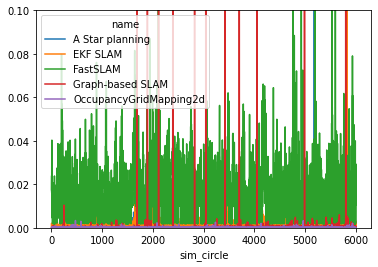

In [195]:
df2_mean.plot()
plt.ylim(0, 0.1)

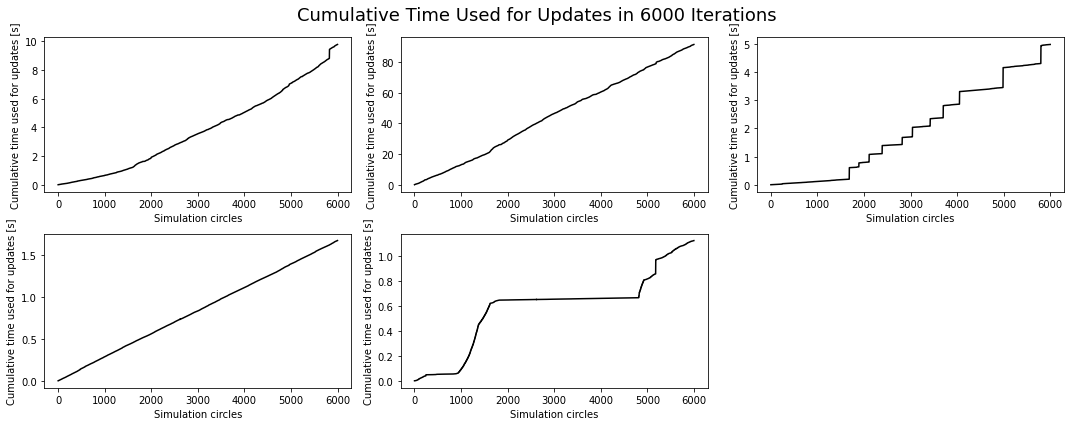

In [219]:
df2_cum = df2_mean.cumsum() #.plot(subplots=True, layout=(2,3), figsize = (12,8), rot = 0)
# plt.legend(loc='upper left', fancybox=True, shadow=True)
# plt.xlabel("Simulation circles")
# plt.ylabel("Cumulative time used for updates")

plt.subplot(2,3,1)

df2_cum["EKF SLAM"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")

plt.subplot(2,3,2)
df2_cum["FastSLAM"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")

plt.subplot(2,3,3)
df2_cum["Graph-based SLAM"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")

plt.subplot(2,3,4)
df2_cum["OccupancyGridMapping2d"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")

plt.subplot(2,3,5)
df2_cum["A Star planning"].plot(color = "k", rot = 0, figsize=(15,6))
plt.xlabel("Simulation circles")
plt.ylabel("Cumulative time used for updates [s]")

plt.suptitle("Cumulative Time Used for Updates in 6000 Iterations", size = 18)
plt.savefig('./scripts/fig/{0}.eps'.format("fig3"), format='eps')
plt.tight_layout()

In [ ]:
global_error = df.pivot(index = "iteration", columns = "name", values="global_error")

plt.subplot(1,3,2)
global_error["INTEL"].plot(color = "k", marker = "^", rot = 0, figsize=(12,3))
plt.xlabel("Iteration")
plt.ylabel("Global error")
plt.title("INTEL")

plt.subplot(1,3,3)
global_error["M3500"].plot(color = "k", marker = "^", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("Global error")
plt.title("M3500")

plt.subplot(1,3,1)
global_error["MITB"].plot(color = "k", marker = "^", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("Global error")
plt.title("MITB")
plt.suptitle("Evolution of Global Error in 10 Iterations", size = 18)
plt.tight_layout()
plt.savefig('./scripts/fig/{0}.eps'.format("Evolution_of_Global_Error"), format='eps')
global_error